In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [2]:
dataset = pd.read_csv("StudentsPerformance_modified.csv")
dataset.shape

(1000, 8)

In [3]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
dataset.dtypes


gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [5]:
dataset.rename(columns={'math score':'Math_score'}, inplace=True)

In [6]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [7]:
mathIsDigit = pd.DataFrame(dataset.Math_score.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
dataset[mathIsDigit['Math_score'] == False]   # from temp take only those rows where hp has false

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
432,male,group C,high school,standard,none,?,56.0,55.0
433,female,group A,some high school,free/reduced,none,?,59.0,50.0
434,male,group C,some high school,standard,none,?,66.0,66.0
435,male,group C,some college,free/reduced,completed,?,48.0,53.0
436,male,group D,associate's degree,standard,none,?,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,?,66.0,73.0
438,male,group C,high school,standard,none,?,56.0,51.0
439,male,group D,some high school,standard,completed,?,88.0,82.0
440,female,group C,some college,standard,completed,?,81.0,79.0
441,female,group D,high school,standard,none,?,81.0,80.0


In [8]:
# Missing values have a'?''
# Replace missing values with NaN
dataset = dataset.replace('?', np.nan)
dataset[mathIsDigit['Math_score'] == False]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
432,male,group C,high school,standard,none,NaN,56.0,55.0
433,female,group A,some high school,free/reduced,none,NaN,59.0,50.0
434,male,group C,some high school,standard,none,NaN,66.0,66.0
435,male,group C,some college,free/reduced,completed,NaN,48.0,53.0
436,male,group D,associate's degree,standard,none,NaN,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,NaN,66.0,73.0
438,male,group C,high school,standard,none,NaN,56.0,51.0
439,male,group D,some high school,standard,completed,NaN,88.0,82.0
440,female,group C,some college,standard,completed,NaN,81.0,79.0
441,female,group D,high school,standard,none,NaN,81.0,80.0


In [9]:
labelencoder = LabelEncoder()
dataset_new = dataset.copy()
dataset_new["parental level of education"] = labelencoder.fit_transform(dataset_new["parental level of education"])
dataset_new["test preparation course"] = labelencoder.fit_transform(dataset_new["test preparation course"])
dataset_new["lunch"] = labelencoder.fit_transform(dataset_new["lunch"])
dataset_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
0,female,group B,1,1,1,72,72.0,74.0
1,female,group C,4,1,0,69,90.0,88.0
2,female,group B,3,1,1,90,95.0,93.0
3,male,group A,0,0,1,47,57.0,44.0
4,male,group C,4,1,1,76,78.0,75.0


In [10]:
dataset_new.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
Math_score                     43
reading score                   6
writing score                   9
dtype: int64

In [11]:
import missingno as msno

<Axes: >

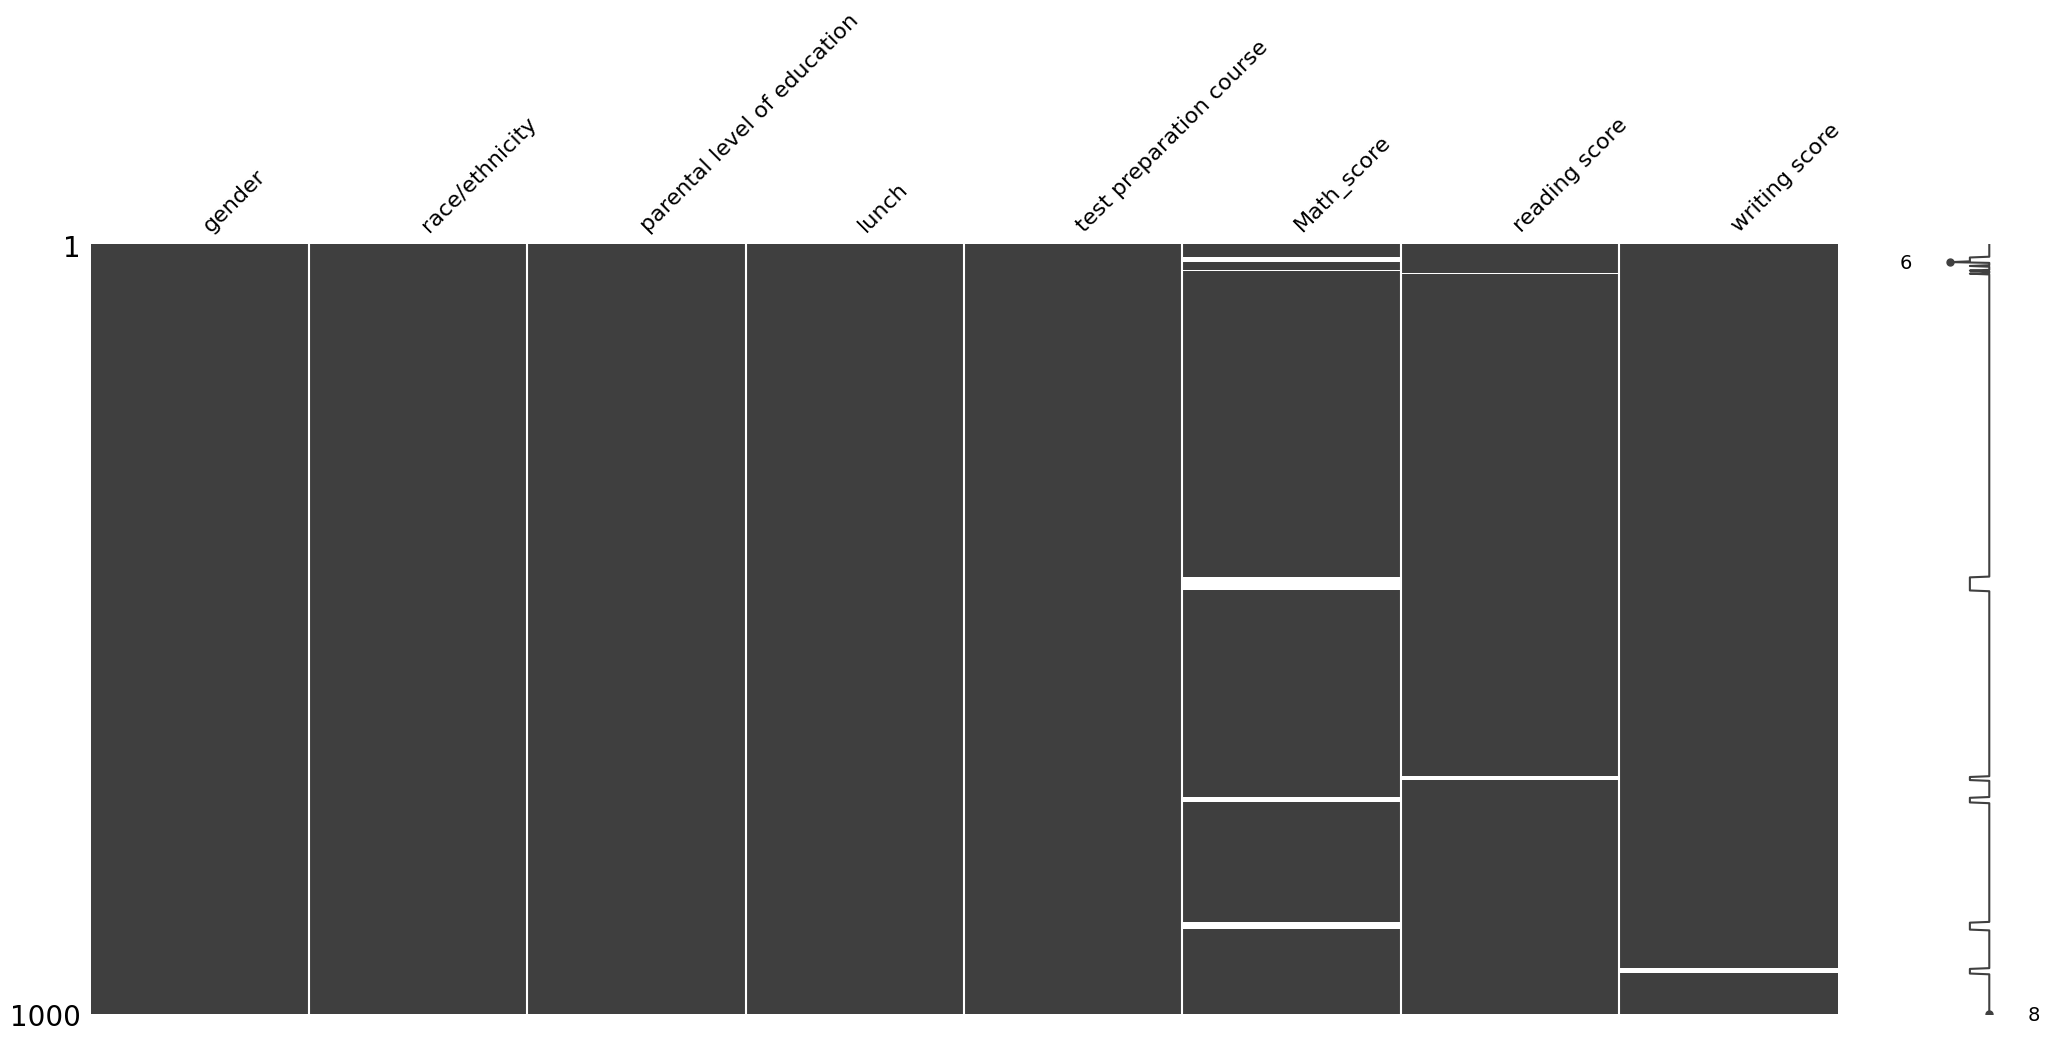

In [12]:
msno.matrix(dataset_new)

In [13]:
dataset_new.describe()

,parental level of education,lunch,test preparation course,reading score,writing score
count,1000.000000,1000.000000,1000.000000,994.000000,991.000000
mean,2.486000,0.645000,0.642000,68.008048,69.487386
std,1.829522,0.478753,0.479652,16.602270,29.563757
min,0.000000,0.000000,0.000000,3.000000,10.000000
25%,1.000000,0.000000,0.000000,58.000000,57.000000
50%,2.000000,1.000000,1.000000,69.500000,69.000000
75%,4.000000,1.000000,1.000000,79.000000,79.000000
max,5.000000,1.000000,1.000000,100.000000,567.000000


In [14]:
dataset_new["Math_score"].str.isdigit().count()

957

In [15]:
dataset_new.dtypes


gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
Math_score                      object
reading score                  float64
writing score                  float64
dtype: object

In [16]:
numeric_cols = ['test preparation course','Math_score','reading score','writing score']
medianFiller = lambda x: x.fillna(x.median())
dataset_new[numeric_cols] = dataset_new[numeric_cols].apply(medianFiller,axis=0)

dataset_new['Math_score'] = dataset_new['Math_score'].astype('float64')  # converting the column from object / string type to float

In [17]:
dataset_new.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
Math_score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [18]:
dataset_new.describe()


,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.486000,0.645000,0.642000,66.310000,68.01700,69.483000
std,1.829522,0.478753,0.479652,17.882497,16.55274,29.430322
min,0.000000,0.000000,0.000000,-89.000000,3.00000,10.000000
25%,1.000000,0.000000,0.000000,57.000000,58.00000,58.000000
50%,2.000000,1.000000,1.000000,66.000000,69.50000,69.000000
75%,4.000000,1.000000,1.000000,76.000000,79.00000,79.000000
max,5.000000,1.000000,1.000000,334.000000,100.00000,567.000000


<ipython-input-19-5bccd51a5064>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["writing score"]])


<Axes: ylabel='Density'>

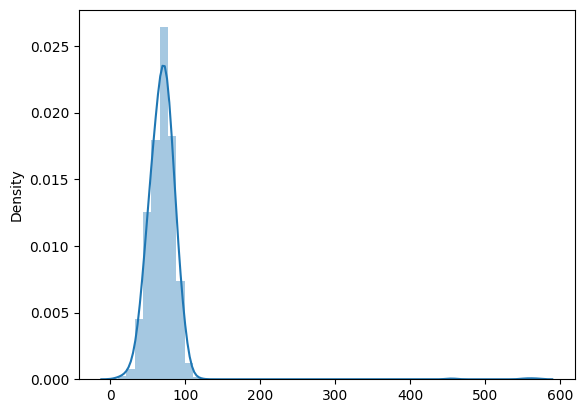

In [19]:
sns.distplot(dataset_new[["writing score"]])

<ipython-input-20-c9fdd02862d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["Math_score"]])


<Axes: ylabel='Density'>

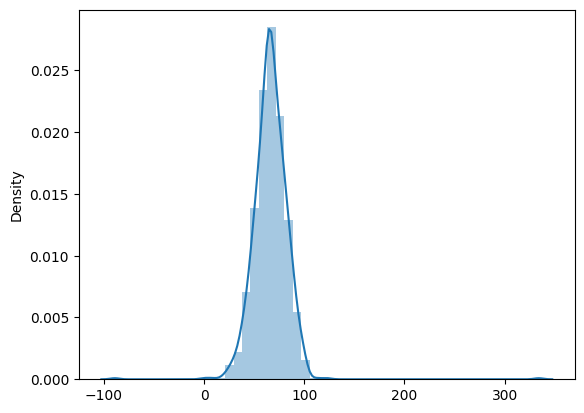

In [20]:
sns.distplot(dataset_new[["Math_score"]])

<ipython-input-21-01bc27aafd38>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["reading score"]])


<Axes: ylabel='Density'>

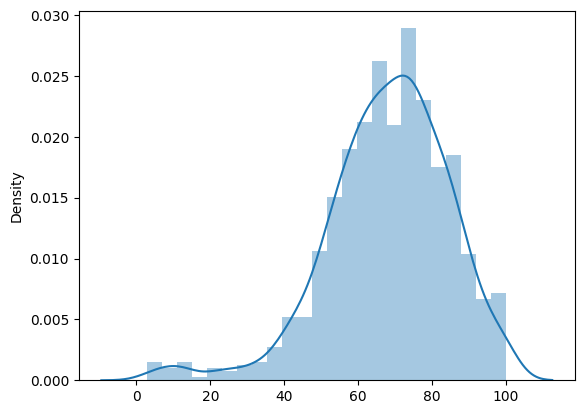

In [21]:
sns.distplot(dataset_new[["reading score"]])

In [23]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

dataset_new[['writing score']] = s.fit_transform(dataset_new[['writing score']])


<ipython-input-24-5bccd51a5064>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new[["writing score"]])


<Axes: ylabel='Density'>

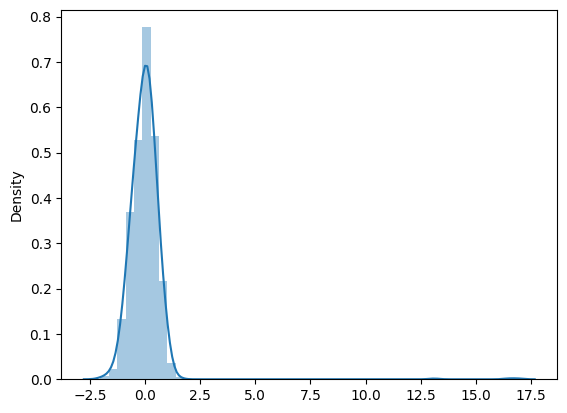

In [24]:
sns.distplot(dataset_new[["writing score"]])

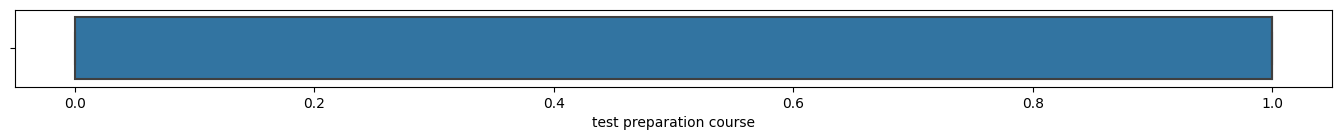

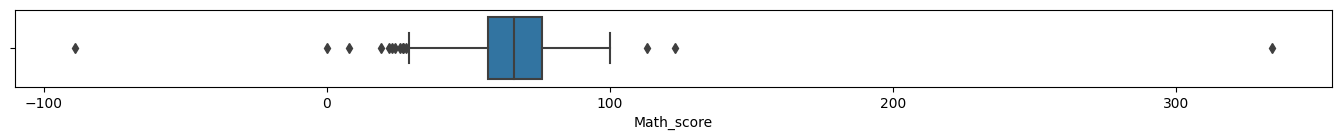

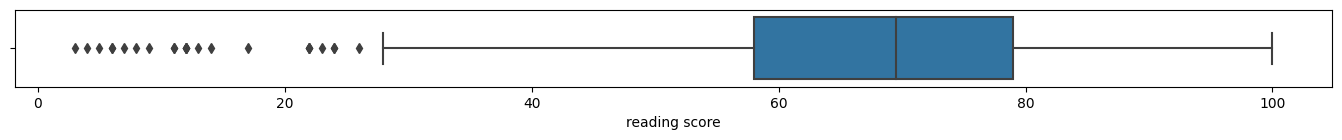

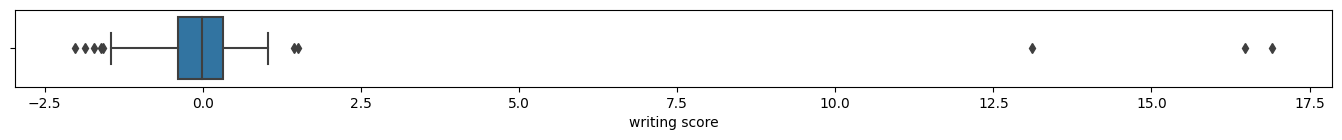

In [25]:
for column in numeric_cols:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=dataset_new, x=column)

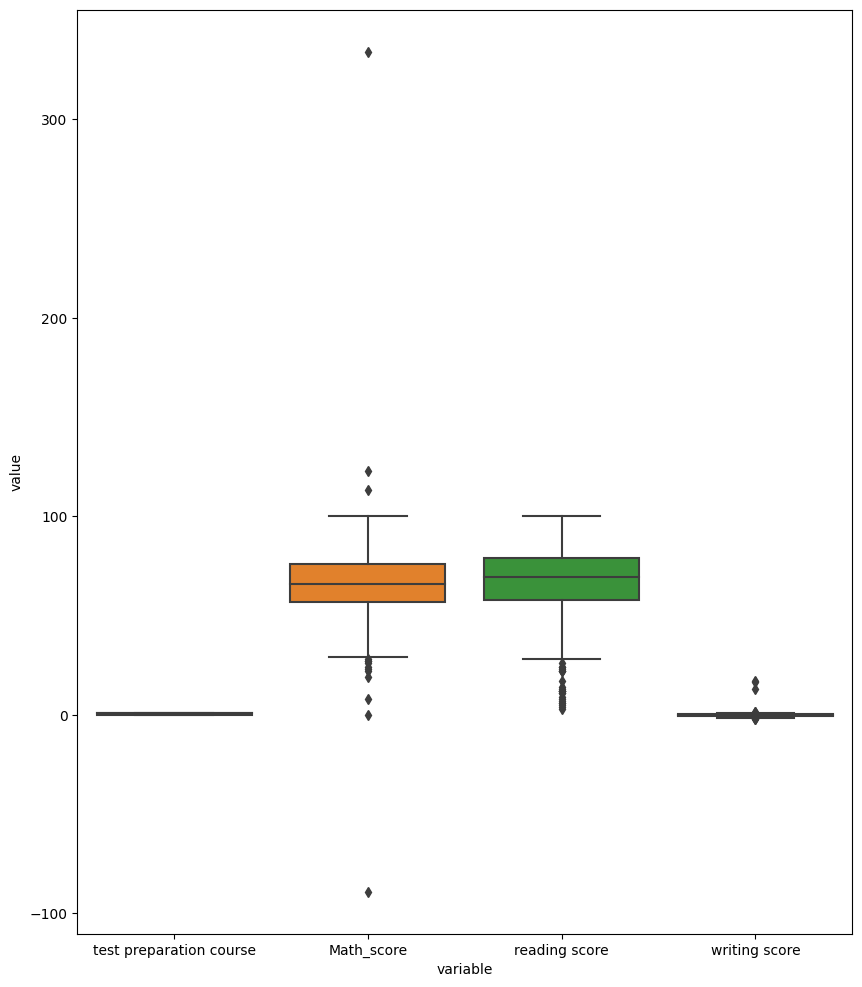

In [26]:
plt.figure(figsize=(10,12))
sns.boxplot(x="variable", y="value", data=pd.melt(dataset_new[numeric_cols]))

plt.show()

In [27]:
Q1 = dataset_new.quantile(0.25)
Q3 = dataset_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


parental level of education     3.000000
lunch                           1.000000
test preparation course         1.000000
Math_score                     19.000000
reading score                  21.000000
writing score                   0.713907
dtype: float64


<ipython-input-27-26fb4f2c0f8b>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset_new.quantile(0.25)
<ipython-input-27-26fb4f2c0f8b>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset_new.quantile(0.75)


In [28]:
low = Q1 - 1.5 * IQR
high = Q3+1.5*IQR
print(low,high)

parental level of education    -3.500000
lunch                          -1.500000
test preparation course        -1.500000
Math_score                     28.500000
reading score                  26.500000
writing score                  -1.461231
dtype: float64 parental level of education      8.500000
lunch                            2.500000
test preparation course          2.500000
Math_score                     104.500000
reading score                  110.500000
writing score                    1.394396
dtype: float64


In [29]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset_new[numeric_cols]))
print(z)
threshold = 3
print(np.where(z > 3))

     test preparation course  Math_score  reading score  writing score
0                   0.746748    0.318347       0.240745       0.153558
1                   1.339140    0.150502       1.328723       0.629496
2                   0.746748    1.325422       1.630939       0.799474
3                   0.746748    1.080367       0.665903       0.866309
4                   0.746748    0.542142       0.603404       0.187554
..                       ...         ...            ...            ...
995                 1.339140    1.213525       1.872711       0.867465
996                 0.746748    0.241138       0.786789       0.492358
997                 1.339140    0.408984       0.180302       0.152402
998                 1.339140    0.094553       0.603404       0.255545
999                 0.746748    0.598090       1.086950       0.561505

[1000 rows x 4 columns]
(array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  59,  59, 431, 456, 474, 542

In [30]:
dataset_new_1 = dataset_new[(z < 3).all(axis=1)]
print(dataset_new.shape,dataset_new_1.shape)

(1000, 8) (976, 8)


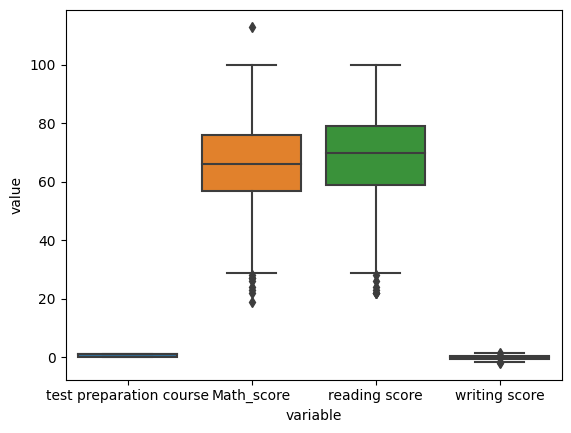

In [31]:
sns.boxplot(x="variable", y="value", data=pd.melt(dataset_new_1[numeric_cols]))

plt.show()

In [32]:
# IQR Score -
# we can use previously calculated IQR score to filter out the outliers by keeping only valid values.
dataset_new_2 = dataset_new[~((dataset_new < low) |(dataset_new > high)).any(axis=1)]
print(dataset_new.shape,dataset_new_2.shape)

(1000, 8) (960, 8)


<ipython-input-32-03bba722a518>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset_new_2 = dataset_new[~((dataset_new < low) |(dataset_new > high)).any(axis=1)]


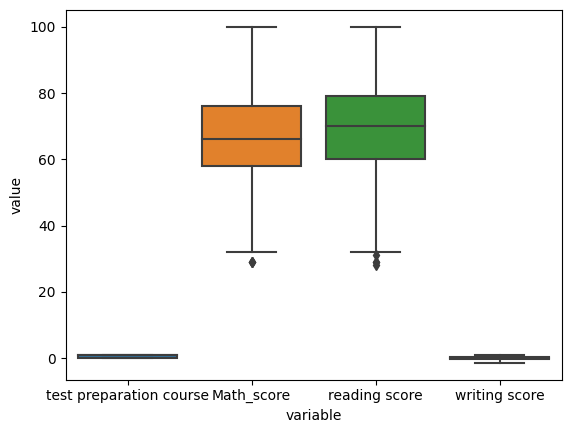

In [33]:
plt.figsize=(8,16)
sns.boxplot(x="variable", y="value", data=pd.melt(dataset_new_2[numeric_cols]))

plt.show()

In [34]:
dataset_new.describe()

,parental level of education,lunch,test preparation course,Math_score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03
mean,2.486000,0.645000,0.642000,66.310000,68.01700,-1.278977e-16
std,1.829522,0.478753,0.479652,17.882497,16.55274,1.000500e+00
min,0.000000,0.000000,0.000000,-89.000000,3.00000,-2.022158e+00
25%,1.000000,0.000000,0.000000,57.000000,58.00000,-3.903711e-01
50%,2.000000,1.000000,1.000000,66.000000,69.50000,-1.641986e-02
75%,4.000000,1.000000,1.000000,76.000000,79.00000,3.235358e-01
max,5.000000,1.000000,1.000000,334.000000,100.00000,1.691337e+01


In [35]:
from sklearn.preprocessing import MinMaxScaler
df_min_max_scaled = dataset_new.copy()

# apply normalization techniques
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(dataset_new[numeric_cols].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()


Scaled Dataset Using MinMaxScaler


,test preparation course,Math_score,reading score,writing score
0,1.0,0.380615,0.711340,0.114901
1,0.0,0.373522,0.896907,0.140036
2,1.0,0.423168,0.948454,0.149013
3,1.0,0.321513,0.556701,0.061041
4,1.0,0.390071,0.773196,0.116697


In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df_std_scaled = std_scaler.fit_transform(dataset_new[numeric_cols].to_numpy())
df_std_scaled = pd.DataFrame(df_std_scaled, columns=numeric_cols)

print("Scaled Dataset Using StandardScaler")
df_std_scaled.head()

Scaled Dataset Using StandardScaler


,test preparation course,Math_score,reading score,writing score
0,0.746748,0.318347,0.240745,0.153558
1,-1.339140,0.150502,1.328723,0.629496
2,0.746748,1.325422,1.630939,0.799474
3,0.746748,-1.080367,-0.665903,-0.866309
4,0.746748,0.542142,0.603404,0.187554
